In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline

Loading the dataset:

In [3]:
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Shape

In [5]:
data.shape

(303, 14)

Variable Types

In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# EDA & Pre-Processing

Outcome variable count

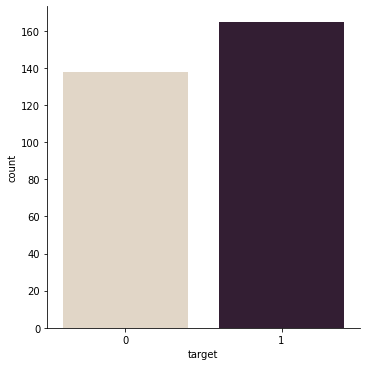

In [7]:
sns.catplot(x='target', kind='count', palette='ch: .25', data=data)

# Categorical predictive variables

sex:

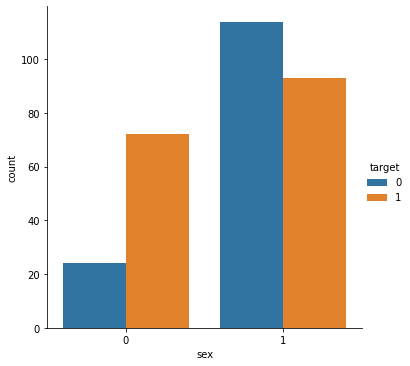

In [8]:
sns.catplot(x='sex', kind='count', hue='target', data=data)

cp:

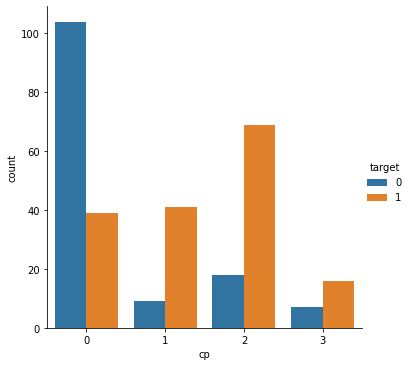

In [9]:
sns.catplot(x='cp', kind='count', hue='target', data=data)

fbs:

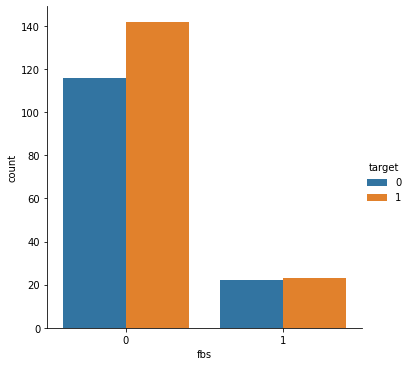

In [10]:
sns.catplot(x='fbs', kind='count', hue='target', data=data)

restecg:

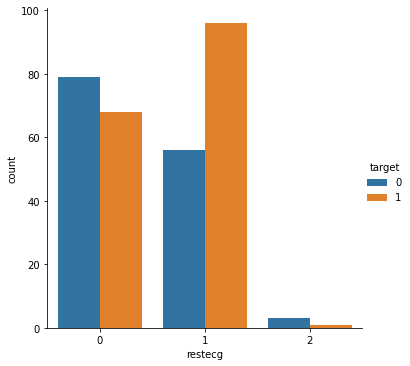

In [11]:
sns.catplot(x='restecg', kind='count', hue='target', data=data)

exang:

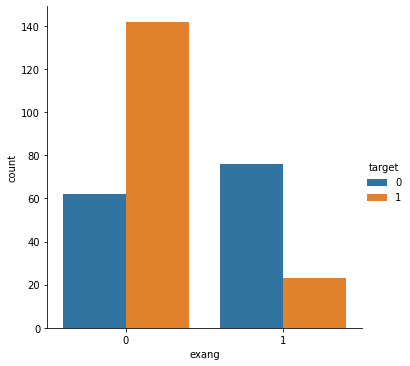

In [12]:
sns.catplot(x='exang', kind='count', hue='target', data=data)

slope:

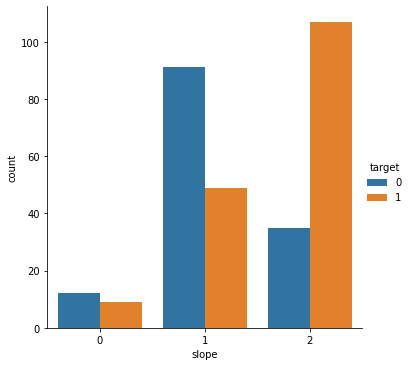

In [13]:
sns.catplot(x='slope', kind='count', hue='target', data=data)

ca:

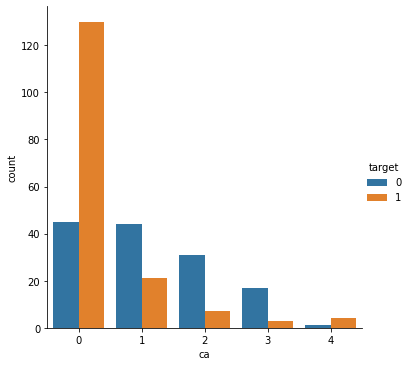

In [14]:
sns.catplot(x='ca', kind='count', hue='target', data=data)

thal:

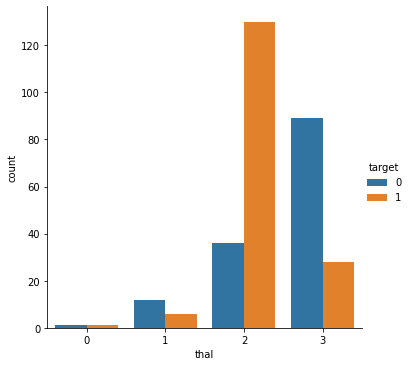

In [15]:
sns.catplot(x='thal', kind='count', hue='target', data=data)

# Distributive predictional variables

In [16]:
data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


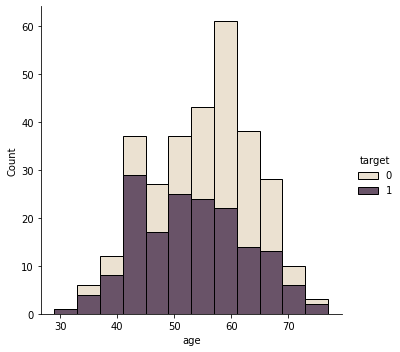

In [17]:
sns.displot(x='age', multiple='stack', hue='target', data=data, palette='ch:.25')

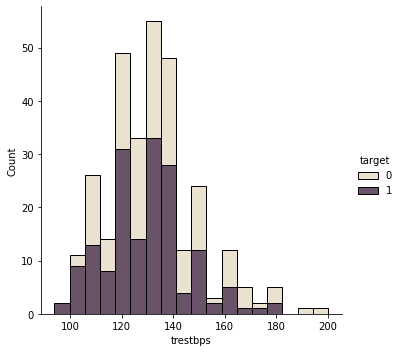

In [18]:
sns.displot(x='trestbps', multiple='stack', hue='target', data=data, palette='ch:.25')

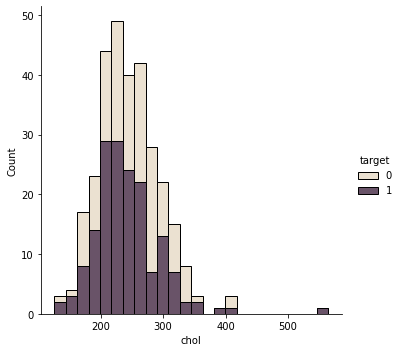

In [19]:
sns.displot(x='chol', multiple='stack', hue='target', data=data, palette='ch:.25')

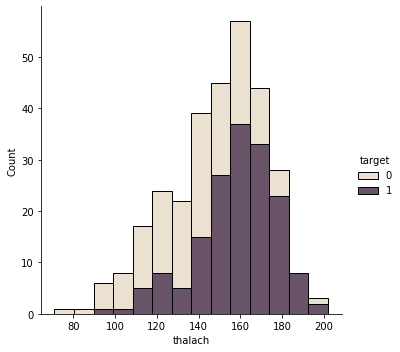

In [20]:
sns.displot(x='thalach', multiple='stack', hue='target', data=data, palette='ch:.25')

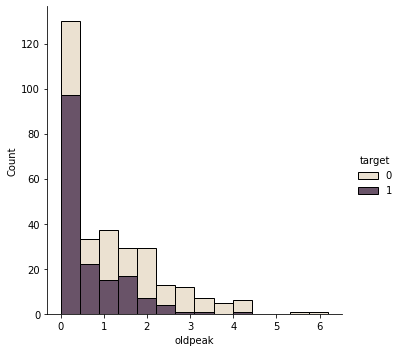

In [21]:
sns.displot(x='oldpeak', multiple='stack', hue='target', data=data, palette='ch:.25')

# Splitting & Pre-Processing

Defining x_train, x_test, y_train and y_test

In [23]:
x=data.drop('target', axis=1)
y=data['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Scaling the data:

In [24]:
sc=StandardScaler().fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

# Training the Model

Parameters for grid search:

In [25]:
knn=KNeighborsClassifier()
parameters={'n_neighbors' : [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

Fiting training data and grid searching:

In [26]:
grid=GridSearchCV(knn, parameters, cv=4, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Displaying best parameters:

In [27]:
print(grid.best_params_)

{'n_neighbors': 5, 'weights': 'uniform'}


Picking the best model:

In [28]:
model=grid.best_estimator_

# Evaluating the model

Model score on test data:

In [29]:
model.score(x_test, y_test)

0.9016393442622951

Confusion matrix:

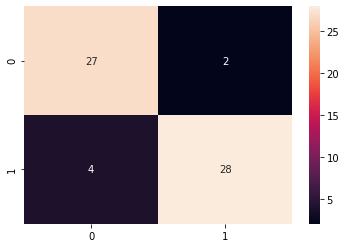

In [30]:
predictions=model.predict(x_test)
cm=metrics.confusion_matrix(y_test, predictions)
cm=pd.DataFrame(cm)
sns.heatmap(cm, annot=True)
plt.show()

Calculating sensivity, specificity, PPV and NPV:

In [31]:
TP=28
FP=2
TN=27
FN=4
sensivity=TP/(TP+FN)*100
specificity=TN/(TN+FP)*100
ppv=TP/(TP+FP)*100
npv=TN/(TN+FN)*100

Printing sensivity, specificity, PPV and NPV:

In [32]:
print('Sensivity:', sensivity,'% ','Specificity:', specificity,'% ','positive predicitve value:',ppv,'% ','negative predictive value',npv,'% ')

Sensivity: 87.5 %  Specificity: 93.10344827586206 %  positive predicitve value: 93.33333333333333 %  negative predictive value 87.09677419354838 % 


AUC Score:

In [33]:
probs=model.predict_proba(x_test)[:, 1]
auc=metrics.roc_auc_score(y_test, probs)
print(auc)

0.9154094827586208


ROC Curve:

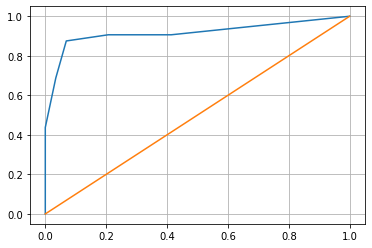

In [34]:
fpr, tpr, _ =metrics.roc_curve(y_test, probs)
plt.figure()
plt.grid()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.show()